In [1]:
import nltk
import urllib.request
import matplotlib.pyplot as plt
import spacy
import es_core_news_sm
import operator
import seaborn as sns
import numpy as np

from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

# Clasificacion de Texto

## Funciones

In [2]:
def scraping(url):
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html,"html.parser")
    return [soup,soup.get_text(strip=True)]

In [3]:
def filtradoAlfabetico(tokens):
    return [word.lower() for word in tokens if word.isalpha() and len(word) > 1 ]

In [4]:
def eliminarPalabrasParada(tokens):
    Tokens_limpios = tokens[:]

    for token in tokens:
        if token in stopwords.words("spanish"):
            Tokens_limpios.remove(token)
    return Tokens_limpios

In [5]:
def lematizarEspaniol(cadena,imprimir = False):
    tokens_limpios_lem = []
    for token in cadena:
        if imprimir:
            print(f'{token.text} - {token.lemma_} - {token.pos_}') 
        tokens_limpios_lem.append(token.lemma_)
    return tokens_limpios_lem

In [6]:
def frecuenciaPalabras(tokens,imprimir = False):
    freq = nltk.FreqDist(tokens)
    if imprimir:
        for palabra,valor in freq.items():
            print(f"{palabra}: {valor}")
    return freq

In [7]:
def vizualizarTokens(tokens,n_words = 30):
    tokens.plot(n_words,cumulative=False)

In [8]:
def vizualizarBarras(x_list,y_list,xlabel="",ylabel=""):
    sns.set_style("whitegrid")
    plt.figure(figsize=(8,6))
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.xticks(fontsize=12)
    sns.barplot(x=x_list, y=y_list, palette=["#CFC60E","#0F5F8C"])
    plt.show()

#### - Scraping https://www.ionos.es/digitalguide/paginas-web/desarrollo-web/que-es-el-web-scraping/

In [9]:
soup,text = scraping("https://www.ionos.es/digitalguide/paginas-web/desarrollo-web/que-es-el-web-scraping/")

In [10]:
tokens = word_tokenize(text,"spanish")

In [11]:
tokens = filtradoAlfabetico(tokens)

In [12]:
Tokens_limpios = eliminarPalabrasParada(tokens)

In [13]:
freq = frecuenciaPalabras(Tokens_limpios,imprimir=True)

web: 45
scraping: 21
utiliza: 9
técnica: 1
ionosdigital: 1
guidepáginas: 1
webcreación: 1
páginas: 10
webdiseño: 1
webdesarrollo: 2
webderecho: 1
digitalhostingcmsblogscuestiones: 1
técnicasservidoresknow: 1
howconfiguraciónseguridadherramientasdominiosextensiones: 1
dominiogestión: 1
dominiosnoticias: 1
dominosconsejos: 1
dominiosonline: 1
marketingvender: 1
internetmarketing: 1
motores: 2
búsquedaredes: 1
socialesanálisis: 1
webcorreo: 1
marketingseguridad: 1
correo: 6
electrónicocuestiones: 1
técnicasproductos: 1
ionosdominiosdominios: 2
registra: 2
compra: 2
ahoranuevos: 2
nombres: 2
dominiostransferencia: 1
dominiosregistro: 1
dominio: 5
privadoinformación: 1
whoisdomain: 1
checkdominio: 1
gratiscorreo: 1
officedirección: 2
electrónicoservidoresservidor: 1
cloudservidores: 1
dedicadosservidores: 1
virtualesservidorescloud: 1
empresarialseguridadcertificado: 1
sslssl: 1
checkerpáginas: 1
hostingcrea: 2
página: 12
webplantillas: 1
webtiendas: 1
onlinehosting: 1
linuxwordpress: 1
hos

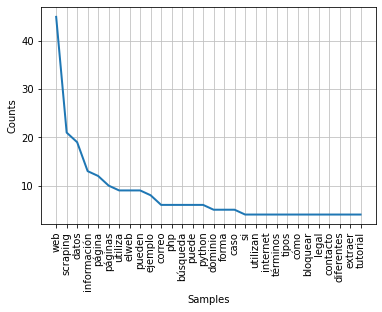

In [14]:
vizualizarTokens(freq)

### - Lematización en Español

In [15]:
nlp = es_core_news_sm.load()#instancia
cadena = (" ".join(Tokens_limpios))#string
cadena = nlp(cadena)

In [16]:
tokens_limpios_lem = lematizarEspaniol(cadena,imprimir = True)

- artículo - PROPN
web - web - PROPN
scraping - scraping - PROPN
motores - motor - NOUN
búsqueda - búsqueda - NOUN
google - google - PROPN
utilizan - utilizar - AUX
hace - hacer - AUX
tiempo - tiempo - NOUN
denominadosrastreadores - denominadosrastreadores - NOUN
webocrawlers - webocrawlers - PROPN
exploran - explorar - AUX
internet - internet - PROPN
busca - buscar - VERB
términos - término - NOUN
definidos - definir - ADJ
usuario - usuario - NOUN
rastreadores - rastreador - NOUN
tipos - tipo - NOUN
especiales - especial - ADJ
debots - debots - ADJ
visitan - visitar - AUX
página - página - INTJ
web - web - PROPN
tras - tras - ADP
generar - generar - VERB
asociaciones - asociación - NOUN
términos - término - NOUN
búsqueda - búsqueda - VERB
categorizarlos - categorizarlos - VERB
primer - ﻿1 - ADJ
rastreador - rastreador - NOUN
web - web - PROPN
creó - crear - VERB
presentó - presentar - VERB
primer - ﻿1 - ADJ
motor - motor - NOUN
búsqueda - búsqueda - PROPN
técnicas - técnico - ADJ
rast

In [17]:
freq_lem = frecuenciaPalabras(tokens_limpios_lem)

## Resultados

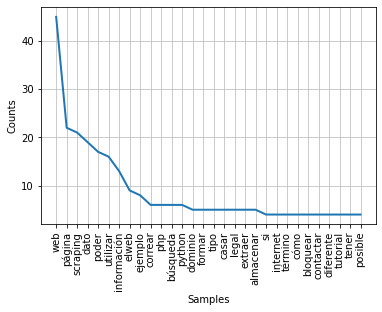

In [18]:
vizualizarTokens(freq_lem)

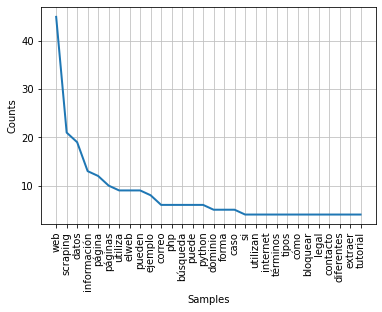

In [19]:
vizualizarTokens(freq)

In [20]:
 print(f"Total, de palabras lematizas: {len(freq_lem)} \nTotal, de palabras No lematizas: { len(freq)}")


Total, de palabras lematizas: 549 
Total, de palabras No lematizas: 606


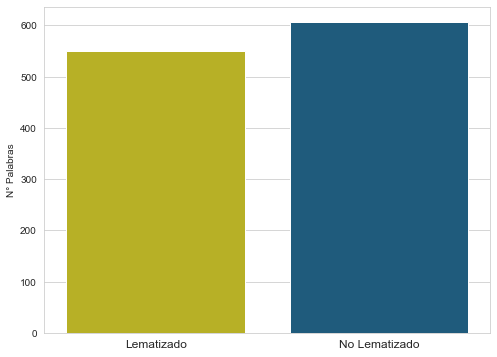

In [21]:
vizualizarBarras(["Lematizado","No Lematizado"],[len(freq_lem),len(freq)],"N° Palabras")

# ETL

## Funciones

In [22]:
def ordenarFrecuencia(freq_lem,imprimir = False):
    wordKeys = []
    items_sort = sorted(freq_lem.items(), key=operator.itemgetter(1), reverse=True)
    for name in enumerate(items_sort):
        if imprimir:
            print(name[1][0], '=', freq_lem[name[1][0]])
        wordKeys.append(name[1][0])
    return wordKeys

In [23]:
def busquedaPorEtiquetaHtml(tagName,length):
    Content = ''
    for tag in soup.find_all(tagName):
        if(len(tag.text) > length):
            Content += tag.text+'\n\n '
    return Content

In [24]:
def filtradoEtiquetas(sent_tokens,keys,numero = 2):
    corpus = []
    c = 0
    for sent in sent_tokens:
        words = nltk.word_tokenize(sent)
        for w in words:
            if w in keys:
                c += 1     
        if c > numero:
            corpus.append(sent)
        c = 0
    return corpus

In [25]:
def frecuenciaEtiquetasHtml(imprimir=False):
    setTag = [x.name for x in soup.find_all(True)]
    return frecuenciaPalabras(setTag,imprimir)

In [26]:
def filtradoPalabras(palabras,filtro):
    return [p for p in palabras if p not in filtro]

## Resultados

html: 1
head: 1
meta: 15
script: 22
base: 1
link: 18
title: 1
body: 1
div: 142
header: 2
a: 161
span: 61
img: 10
nav: 2
ul: 37
li: 153
form: 3
fieldset: 1
input: 13
button: 5
strong: 61
p: 52
main: 1
ol: 2
time: 5
label: 10
i: 22
picture: 4
source: 12
h1: 1
em: 55
h2: 9
section: 1
article: 3
h3: 3
h4: 5
footer: 1
br: 2
style: 1
noscript: 1


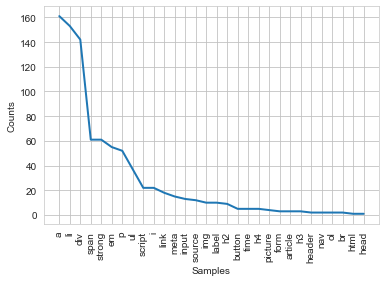

In [27]:
vizualizarTokens(frecuenciaEtiquetasHtml(imprimir=True))

In [28]:
contenido_etiquetas = busquedaPorEtiquetaHtml('p',length=144)
print(contenido_etiquetas)

Los motores de búsqueda, como Google, utilizan desde hace tiempo los denominados rastreadores web o crawlers, que exploran Internet en busca de términos definidos por el usuario. Los rastreadores son tipos especiales de bots, que visitan una página web tras otra para generar asociaciones con términos de búsqueda y categorizarlos. El primer rastreador web se creó ya en 1993, cuando se presentó el primer motor de búsqueda: Jumpstation.

 Entre estas técnicas de rastreo se incluye el web scraping o webharvesting. Te explicamos cómo funciona, para qué se utiliza y cómo se puede bloquear en caso necesario.

 Durante el web scraping (del inglés scraping = arañar/raspar) se extraen y almacenan datos de páginas web para analizarlos o utilizarlos en otra parte. Por medio de este raspado web se almacenan diversos tipos de información: por ejemplo, datos de contacto, tales como direcciones de correo electrónico o números de teléfono, o también términos de búsqueda o URL. Estos se almacenan en bas

In [29]:
raw = contenido_etiquetas.lower()

In [30]:
contenido_sent_tokens = nltk.sent_tokenize(raw) # convertir Texto a una lista de sentencias (tekenizar en sentencias)

In [31]:
palabras = ordenarFrecuencia(freq_lem,imprimir=True)

web = 45
página = 22
scraping = 21
dato = 19
poder = 17
utilizar = 16
información = 13
elweb = 9
ejemplo = 8
correar = 6
php = 6
búsqueda = 6
python = 6
dominio = 5
formar = 5
tipo = 5
casar = 5
legal = 5
extraer = 5
almacenar = 5
si = 4
internet = 4
término = 4
cómo = 4
bloquear = 4
contactar = 4
diferente = 4
tutorial = 4
tener = 4
posible = 4
sitio = 4
permitir = 4
técnico = 3
motor = 3
webanálisis = 3
ip = 3
gratis = 3
gran = 3
propio = 3
tender = 3
electrónico = 3
rendimiento = 3
artículo = 3
﻿1 = 3
crear = 3
funcionar = 3
fin = 3
mediar = 3
número = 3
leer = 3
cabo = 3
recurrir = 3
convertir = 3
cliente = 3
método = 3
utilización = 3
contar = 3
menudo = 3
producto = 3
tecnología = 3
comparación = 3
portal = 3
derecho = 3
operador = 3
existir = 3
lenguaje = 3
webdesarrollo = 2
ionosdominiosdominios = 2
registrar = 2
comprar = 2
ahoranuevos = 2
nombre = 2
officedirección = 2
hostingcrea = 2
servicio = 2
nuevo = 2
incluir = 2
variedad = 2
online = 2
elección = 2
profesional = 2
host

In [32]:
palabras_limpias = filtradoPalabras(palabras,['SQL','sql','PHP','php','cómo','tener','si','\ufeff1','elweb'])[:40]

In [33]:
corpus = filtradoEtiquetas(contenido_sent_tokens,palabras_limpias,numero=2)

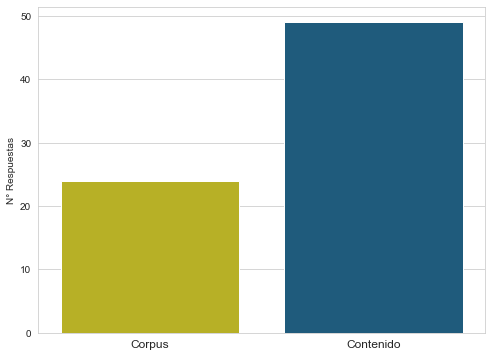

In [34]:
vizualizarBarras(["Corpus","Contenido"],[len(corpus),len(contenido_sent_tokens)],"N° Respuestas")

### CORPUS

In [47]:
i = 0
for r in corpus:
    i += 1
    print(f"{i}) {r}",end="\n\n")

1) los motores de búsqueda, como google, utilizan desde hace tiempo los denominados rastreadores web o crawlers, que exploran internet en busca de términos definidos por el usuario.

2) los rastreadores son tipos especiales de bots, que visitan una página web tras otra para generar asociaciones con términos de búsqueda y categorizarlos.

3) el primer rastreador web se creó ya en 1993, cuando se presentó el primer motor de búsqueda: jumpstation.

4) durante el web scraping (del inglés scraping = arañar/raspar) se extraen y almacenan datos de páginas web para analizarlos o utilizarlos en otra parte.

5) por medio de este raspado web se almacenan diversos tipos de información: por ejemplo, datos de contacto, tales como direcciones de correo electrónico o números de teléfono, o también términos de búsqueda o url.

6) con el web scraping se leen textos de páginas web para obtener información y almacenarla, de forma comparable al proceso automático de copiado y pegado.

7) el scraping manual

# CHATBOT

In [35]:
import random
import string
import pyttsx3
import speech_recognition as sr

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
# sent_tokens = nltk.sent_tokenize(raw)
sent_tokens = corpus
word_tokens = nltk.word_tokenize(raw)
lemmer = nltk.stem.WordNetLemmatizer()

### Procesamiento de Voz

In [37]:
r = sr.Recognizer()
mic = sr.Microphone()

### Sintesis de Voz

In [38]:
engine = pyttsx3.init()
engine.setProperty('rate',150)
engine.setProperty('voice','spanish')

### Metodos

In [39]:
def speak(texto):
    engine.say(texto)
    engine.runAndWait()

In [40]:
remove_punct_dict = dict((ord(punct),None) for punct in string.punctuation) #remover signos de puntuacion (utilizamos la )

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens] # Lematizar palabras tokenizadas

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [41]:
#Determinar la similutud del texto inserdado y el corpus

def response(user_response):# funcion respuesta (entrada: mensje de usuario)
    chatbot_response = '' #definir la respuesta del chatbot
    sent_tokens.append(user_response)# al listado de sentencias del corpus añadir al final de la lista el mensaje del usuario
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize,stop_words=stopwords.words('spanish'))# Lematizar y eliminar palbras
    tfidf = TfidfVec.fit_transform(sent_tokens)

    # 3 Evaluar similitud coseno entre mensaje usuario (tfid[-1]) y el corpus(tfidf)
    vals = cosine_similarity(tfidf[-1],tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]

    if(req_tfidf == 0):
        chatbot_response = chatbot_response + "Lo siento, no te he entendido"
        return chatbot_response
    
    else:
        chatbot_response = chatbot_response + sent_tokens[idx]
        return chatbot_response

In [42]:
SALUDOS_INPUTS = ("hola","buenas","saludos","que tal","hey","buenos dias")
SALUDOS_OUTPUTS = ["hola","hola, que tal?","Hola, Como te puedo ayudar?","hola, encantado de hablar contigo"]

def saludos(sentence):
    for word in sentence.split():
        # print(word.lower() in SALUDOS_INPUTS)
        if word.lower() in SALUDOS_INPUTS:
            return random.choice(SALUDOS_OUTPUTS)

In [43]:
def speakAgent(msg):
    print("Roxanne:> ",msg)
    speak(msg)

In [46]:
def chatBots():
    flag = True
    mode = True
    chat = True
    speakAgent("MI NOMBRE ES ROXANNE")
    while(mode == True):
        
        speakAgent("Si deseas hacerme preguntas por voz, por favor escriba, si, de lo contrario te respondere a las preguntas que me escribes en el formulario")
        res = input()
        
        if res.lower() in ["si","ok","y"]:
            print(res)
            chat = False
            mode = False
        elif res.lower() in ["no","not"]:
            mode = False

    while(flag == True):

        if chat:
            speakAgent("Por favor, escribame la pregunta?")
            user_response = input()
            user_response = user_response.lower()
        else:
            speak("Dime cual es tu duda")
            with sr.Microphone() as source:
                r.adjust_for_ambient_noise(source)
                audio = r.listen(source)
                
                try:
                    text = r.recognize_google(audio, language='es',show_all=True)
                    entrada = text['alternative'][0]['transcript']
                    print("user:> ",entrada)
                except:
                    entrada = ' '
                    

            user_response = entrada.lower()

        if(user_response not in ["salir","chao","adios","bay","exit"]):
            if(user_response == 'gracias' or user_response == 'muchas gracias'): #se podria haber definido otra funcion de coincidencia
                flag = True
                speakAgent(thanks_res)
            else:
                if(saludos(user_response) != None): # si la palabra insertada por el usuario es un saludo (coincidencia manuales)
                    greets = saludos(user_response) 
                    speakAgent(greets)

                else:#si la palabra insertada no es un saludo --> Corpus
                    respond = response(user_response)
                    speakAgent(respond)
                    sent_tokens.remove(user_response) # para eliminar del corpus la respues del usuario y volver a evaluar 
        else:
            flag = False
            speakAgent("Nos vemos pronto, !Gracias por su visita¡") 

In [47]:
chatBots()

Roxanne:>  MI NOMBRE ES ROXANNE
Roxanne:>  Si deseas hacerme preguntas por voz, por favor escriba, si, de lo contrario te respondere a las preguntas que me escribes en el formulario
Roxanne:>  Por favor, escribame la pregunta?
Roxanne:>  los motores de búsqueda, como google, utilizan desde hace tiempo los denominados rastreadores web o crawlers, que exploran internet en busca de términos definidos por el usuario.
Roxanne:>  Por favor, escribame la pregunta?
Roxanne:>  Nos vemos pronto, !Gracias por su visita¡


In [48]:
corpus

['los motores de búsqueda, como google, utilizan desde hace tiempo los denominados rastreadores web o crawlers, que exploran internet en busca de términos definidos por el usuario.',
 'los rastreadores son tipos especiales de bots, que visitan una página web tras otra para generar asociaciones con términos de búsqueda y categorizarlos.',
 'el primer rastreador web se creó ya en 1993, cuando se presentó el primer motor de búsqueda: jumpstation.',
 'durante el web scraping (del inglés scraping = arañar/raspar) se extraen y almacenan datos de páginas web para analizarlos o utilizarlos en otra parte.',
 'por medio de este raspado web se almacenan diversos tipos de información: por ejemplo, datos de contacto, tales como direcciones de correo electrónico o números de teléfono, o también términos de búsqueda o url.',
 'con el web scraping se leen textos de páginas web para obtener información y almacenarla, de forma comparable al proceso automático de copiado y pegado.',
 'el scraping manual 